* When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice” or “trellis” plotting, and it is related to the idea of “small multiples”. It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

* To use these features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls “tidy” data. In brief, that means your dataframe should be structured such that each column is a variable and each row is an observation.

* For advanced use, you can use the objects discussed in this part of the tutorial directly, which will provide maximum flexibility. Some seaborn functions (such as lmplot(), catplot(), and pairplot()) also use them behind the scenes. Unlike other seaborn functions that are “Axes-level” and draw onto specific (possibly already-existing) matplotlib Axes without otherwise manipulating the figure, these higher-level functions create a figure when called and are generally more strict about how it gets set up. In some cases, arguments either to those functions or to the constructor of the class they rely on will provide a different interface attributes like the figure size, as in the case of lmplot() where you can set the height and aspect ratio for each facet rather than the overall size of the figure. Any function that uses one of these objects will always return it after plotting, though, and most of these objects have convenience methods for changing how the plot is drawn, often in a more abstract and easy way.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
sns.set_style("whitegrid")

# Conditional small multiples: 

* The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

In [9]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

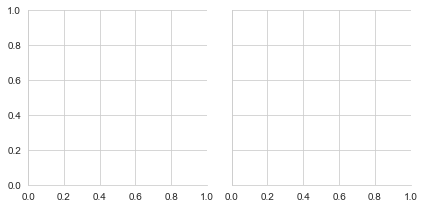

In [17]:
g = sns.FacetGrid(tips, col = 'time')

* The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. Let’s look at the distribution of tips in each of these subsets, using a histogram.

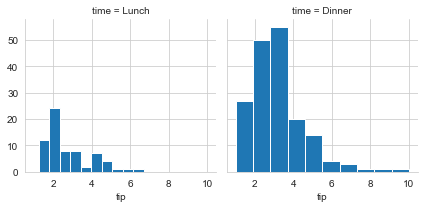

In [18]:
g = sns.FacetGrid(tips, col = 'time')
g.map(plt.hist, "tip");

* This function will draw the figure and annotate the axes, hopefully producing a finished plot in one step. To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:

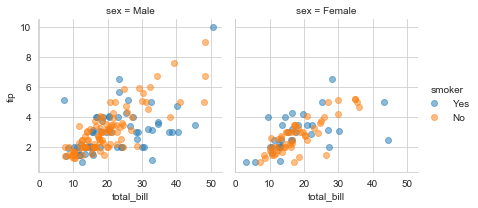

In [23]:
g = sns.FacetGrid(tips, col = 'sex', hue = 'smoker');
g.map(plt.scatter, "total_bill", "tip", alpha = 0.5);
g.add_legend();
pass

* There are several options for controlling the look of the grid that can be passed to the class constructor.

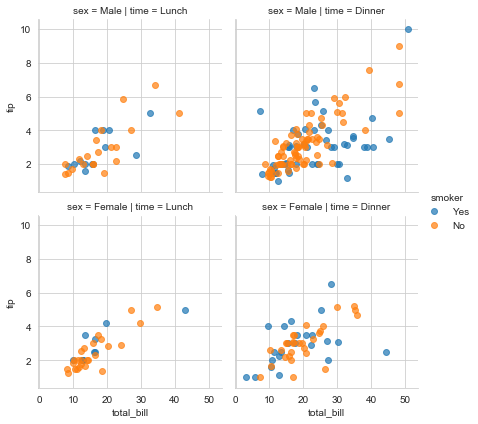

In [24]:
g = sns.FacetGrid(tips, row = 'sex', col = 'time',
                 hue = 'smoker');
g.map(plt.scatter, "total_bill", "tip", alpha = 0.7);
g.add_legend();
pass

/Users/lephuongdong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


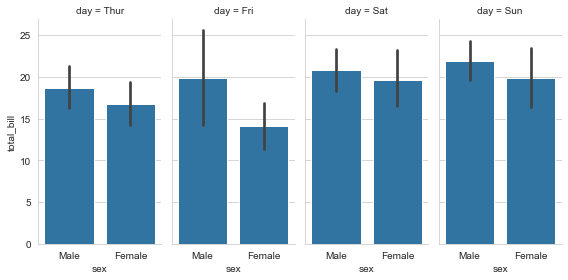

In [25]:
g = sns.FacetGrid(tips, col = 'day', 
                  height = 4, 
                  aspect = 0.5); 
g.map(sns.barplot, "sex", "total_bill");

* The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate *_order parameter:

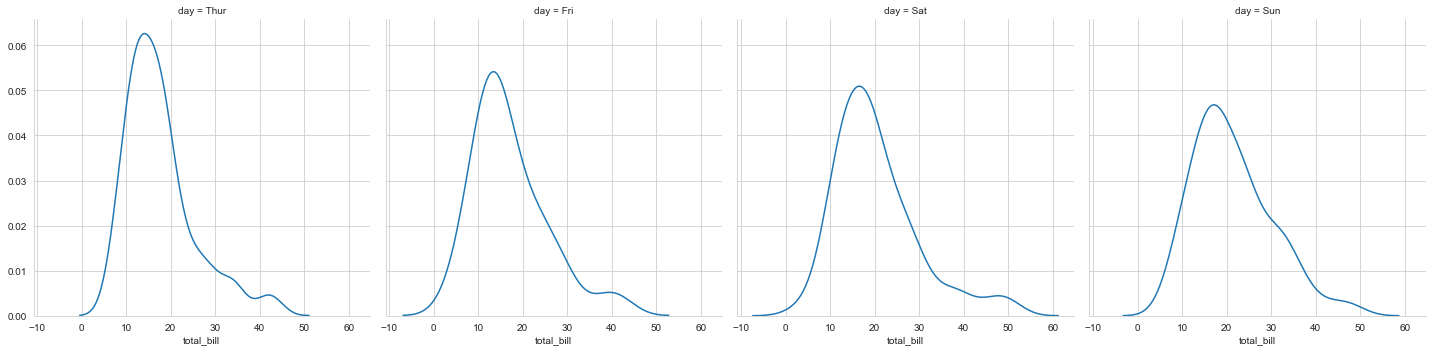

In [33]:
orderday = tips.day.value_counts().index

g  = sns.FacetGrid(tips, col = 'day', row_order = orderday, 
                   height = 5)
g.map(sns.distplot, "total_bill", hist = False, kde = True);
pass

# Plotting pairwise data relationships:

* PairGrid also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a PairGrid, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a “scatterplot matrix”, as this is the most common way to show each relationship, but PairGrid is not limited to scatterplots.

* It’s important to understand the differences between a FacetGrid and a PairGrid. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using PairGrid can give you a very quick, very high-level summary of interesting relationships in your dataset.

In [34]:
iris = sns.load_dataset('iris');
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

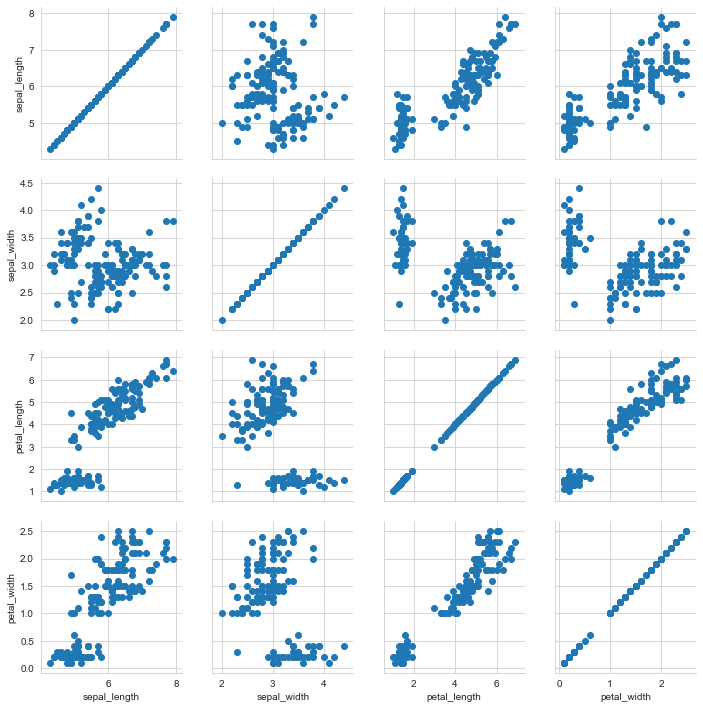

In [39]:
g = sns.PairGrid(iris);
g.map(plt.scatter);
pass

* It’s possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. Note that the axis ticks won’t correspond to the count or density axis of this plot, though.

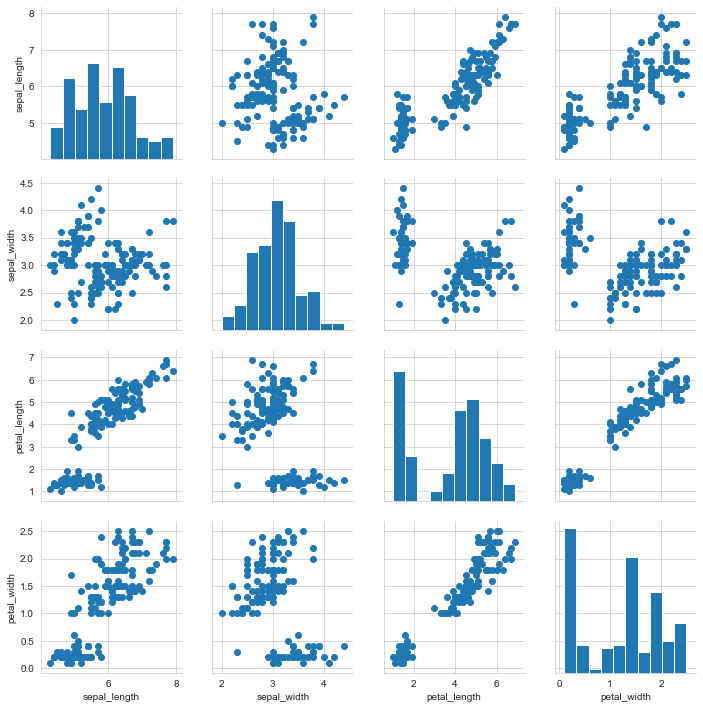

In [42]:
g = sns.PairGrid(iris); 
g.map_diag(plt.hist); 
g.map_offdiag(plt.scatter)
pass

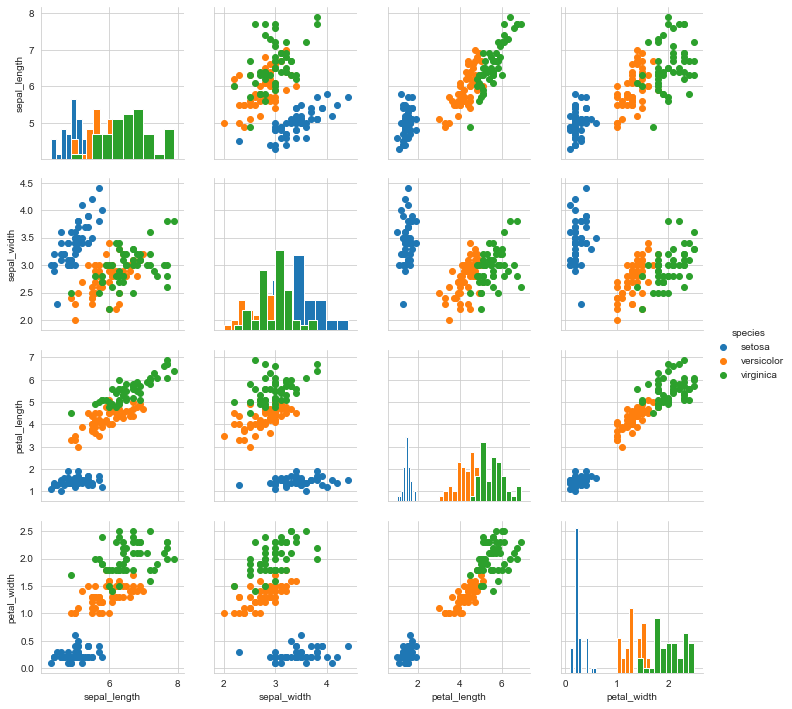

In [43]:
g = sns.PairGrid(iris, hue = 'species');
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);
g.add_legend();
pass

* We can focus on particular relationships if we want: 

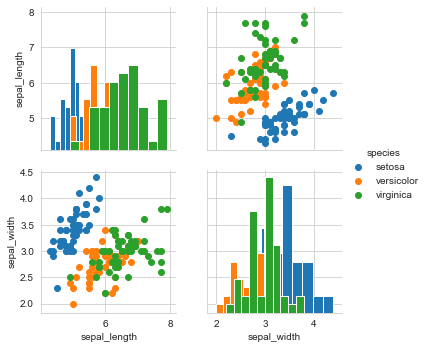

In [44]:
g = sns.PairGrid(iris, hue = 'species',
                vars = ['sepal_length', 'sepal_width']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);
g.add_legend();
pass

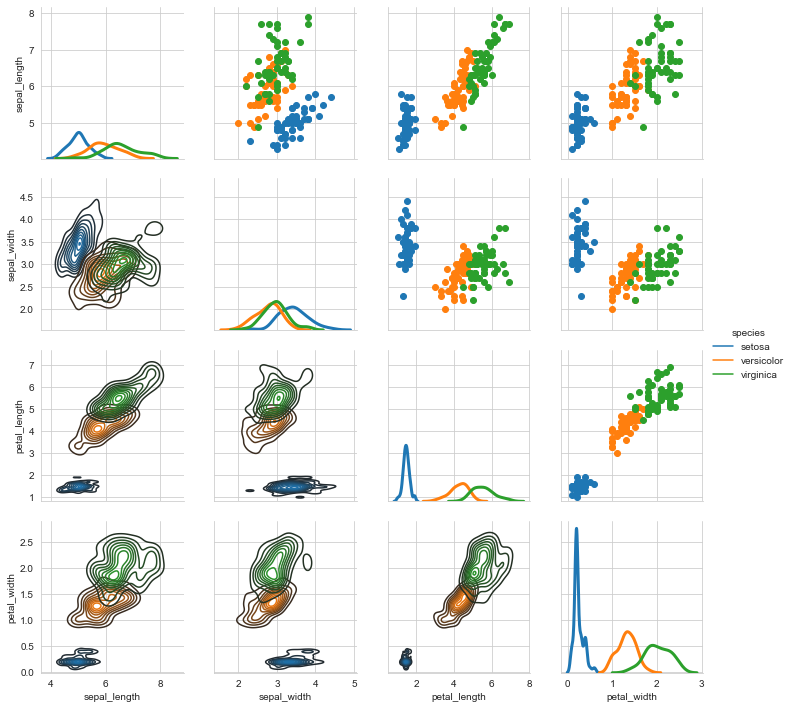

In [45]:
g = sns.PairGrid(iris, hue = 'species');
g.map_upper(plt.scatter);
g.map_lower(sns.kdeplot);
g.map_diag(sns.kdeplot, lw = 3);
g.add_legend();
pass

* PairGrid is flexible, but to take a quick look at a dataset, it can be easier to use pairplot(). This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

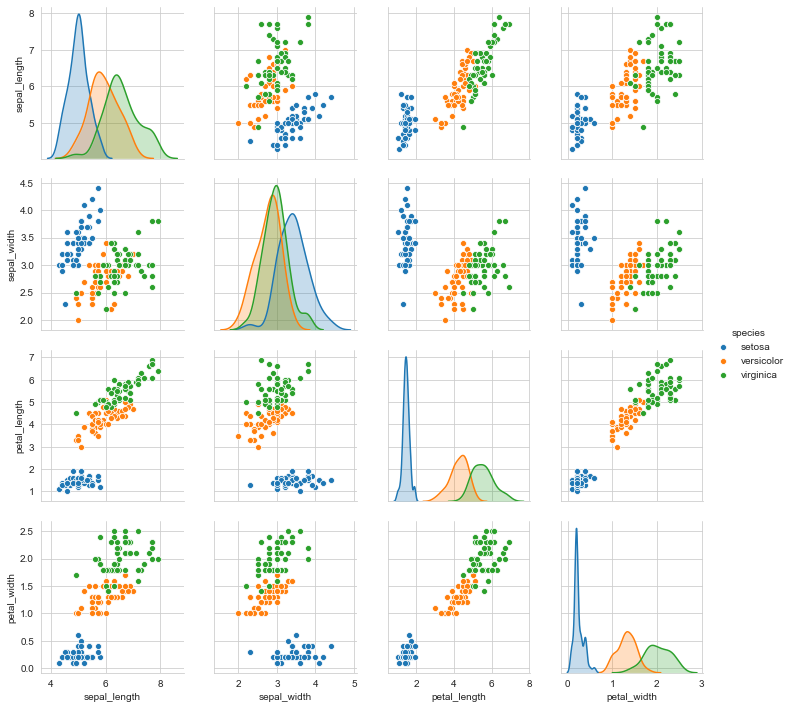

In [46]:
sns.pairplot(iris, hue = 'species', height = 2.5);
pass

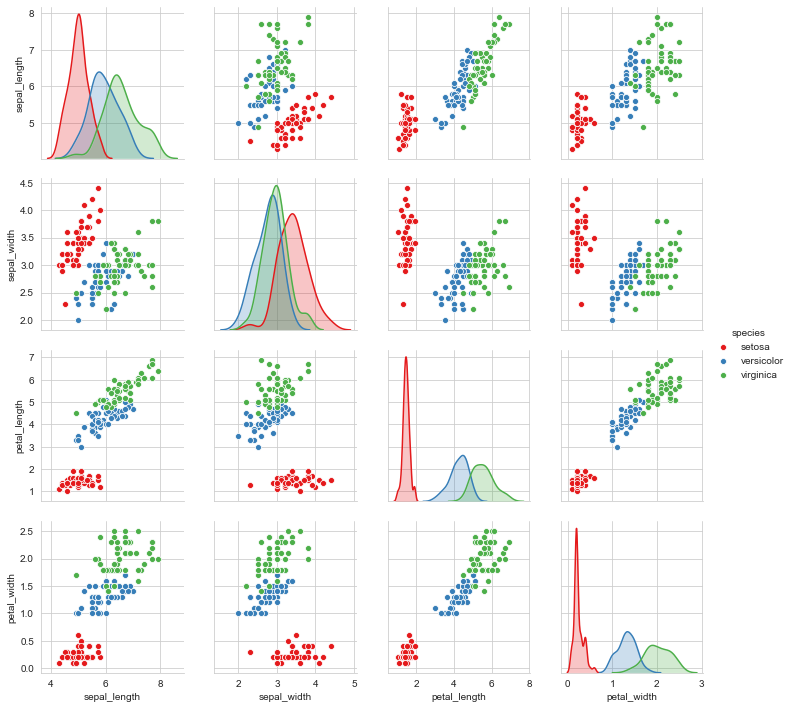

In [51]:
g = sns.pairplot(iris, hue = 'species',
                palette = 'Set1',
                diag_kind = 'kde',
                height = 2.5);
pass